# Programa Ingenias+ Data Science

## ✏️ Ejercitación: Procesamiento y transformación de datos

Esta notebook les permitiria ejercitar los conceptos de Pandas 🐼  y Procesamiento de datos 📊 que aprendimos hasta ahora. Vamos a seguir trabajando con el dataset que contiene datos relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers) que guardamos en la Notebook 10 luego de eliminar valores faltantes y filtrar outliers.

## ¿QUE HACEMOS PRIMERO?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta_del_archivo = '/content/drive/My Drive/JUMP/Propuestas/Clase 14 - Clase práctica/clientes_mall.csv'

In [ ]:
df = pd.read_csv(ruta_del_archivo)

### 3. LEER LOS DATOS

In [ ]:
df

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,1.0,Male,19.0,15.0,39.0
1,1,2.0,NaN,21.0,15.0,81.0
2,2,3.0,Female,20.0,16.0,6.0
3,3,4.0,Female,23.0,16.0,77.0
4,4,5.0,NaN,31.0,17.0,40.0
...,...,...,...,...,...,...
195,195,196.0,NaN,35.0,120.0,79.0
196,196,197.0,Female,45.0,126.0,28.0
197,197,198.0,Male,32.0,126.0,74.0
198,198,199.0,Male,32.0,137.0,18.0


In [ ]:
df.shape

(200, 6)

Este df cuenta con ... columnas y ... filas
Además podemos notar que....

In [ ]:
filas, columnas = df.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 200 filas y 6 columnas.


In [ ]:
df.dtypes

Unnamed: 0                  int64
CustomerID                float64
Genre                      object
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

ESTE ES UN DATASET

In [ ]:
df.columns = ['Sin Nombre', 'CustomerID', 'Genre', 'Age', 'Income', 'Spending_Score']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sin Nombre      200 non-null    int64  
 1   CustomerID      189 non-null    float64
 2   Genre           186 non-null    object 
 3   Age             189 non-null    float64
 4   Income          185 non-null    float64
 5   Spending_Score  186 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [ ]:
valores_faltantes = df.isna().sum()
valores_faltantes

Sin Nombre         0
CustomerID        11
Genre             14
Age               11
Income            15
Spending_Score    14
dtype: int64

In [ ]:
total_filas = len(df)

porcentaje = (valores_faltantes / total_filas) * 100
print(porcentaje)

Sin Nombre        0.0
CustomerID        5.5
Genre             7.0
Age               5.5
Income            7.5
Spending_Score    7.0
dtype: float64


In [ ]:
# Resumen Estadístico Descriptivo
print("Resumen Estadístico Descriptivo:")
print(df.describe())

Resumen Estadístico Descriptivo:
       Sin Nombre  CustomerID         Age      Income  Spending_Score
count  200.000000  189.000000  189.000000  185.000000      186.000000
mean    99.500000  100.063492   38.888889   60.362162       49.924731
std     57.879185   57.507874   13.907878   26.267927       25.844540
min      0.000000    1.000000   18.000000   15.000000        1.000000
25%     49.750000   51.000000   29.000000   42.000000       32.500000
50%     99.500000  100.000000   36.000000   61.000000       49.000000
75%    149.250000  149.000000   49.000000   78.000000       72.750000
max    199.000000  200.000000   70.000000  137.000000       99.000000


La edad promedio de los clientes es de aproximadamente 38.89 años, mientras que la mediana es de 36 años, lo que indica que la distribución de edad es ligeramente asimétrica hacia edades mayores.


 La edad mínima es de 18 años y la máxima es de 70 años. Esto sugiere que la muestra incluye tanto adultos jóvenes como personas mayores.

---

 El ingreso promedio es de aproximadamente 60,362.16, mientras que la mediana es de 61,000. Esto sugiere que los ingresos están bastante equilibrados en torno a la media.

 El ingreso varía de 15,000 a 137,000. Este amplio rango indica una diversidad considerable en el nivel de ingresos de los clientes.

 ---



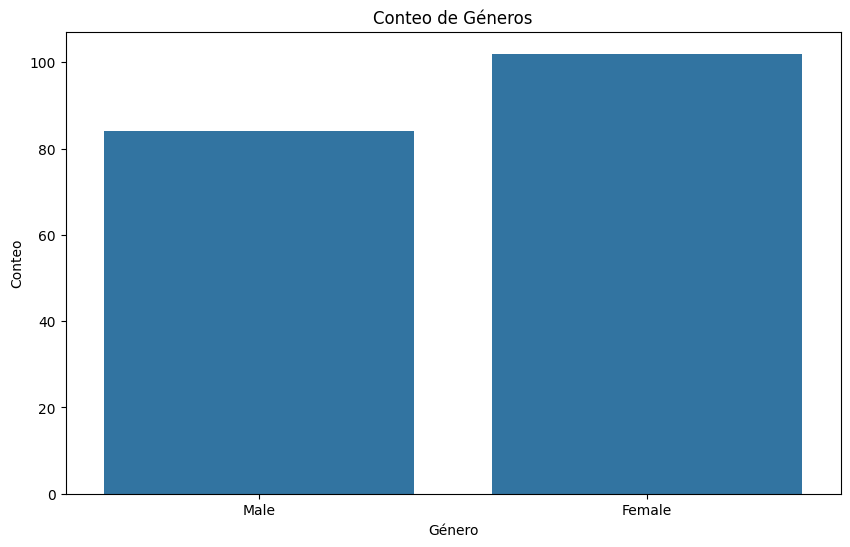

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=df)
plt.title('Conteo de Géneros')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.show()

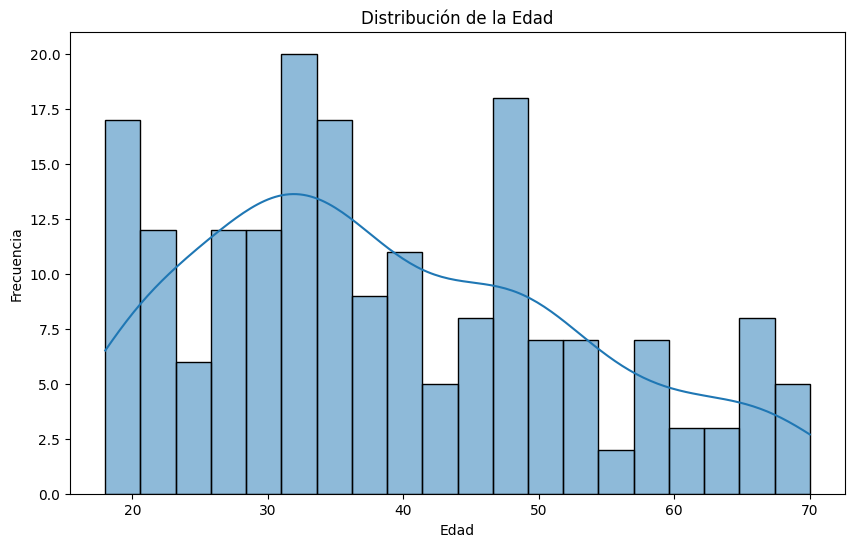

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


ESTE GRAFICO ME MUESTRA que hay una disperi

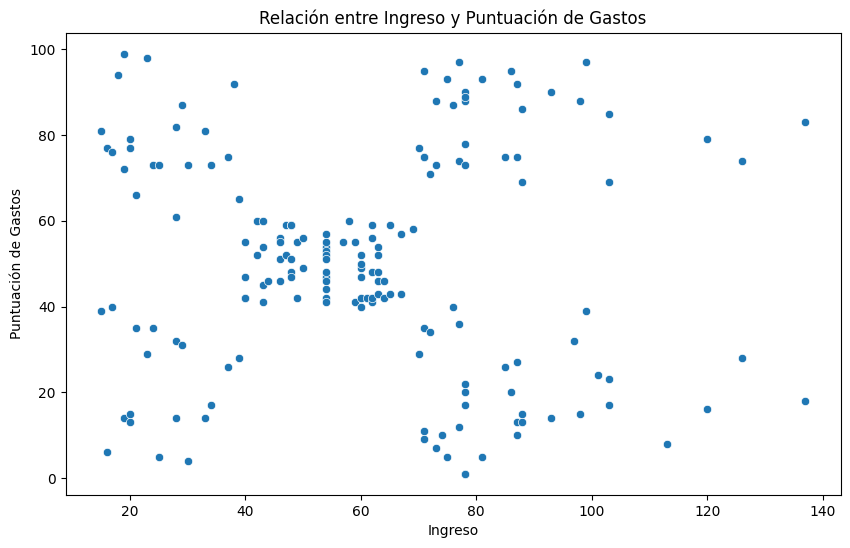

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Spending_Score', data=df)
plt.title('Relación entre Ingreso y Puntuación de Gastos')
plt.xlabel('Ingreso')
plt.ylabel('Puntuación de Gastos')
plt.show()

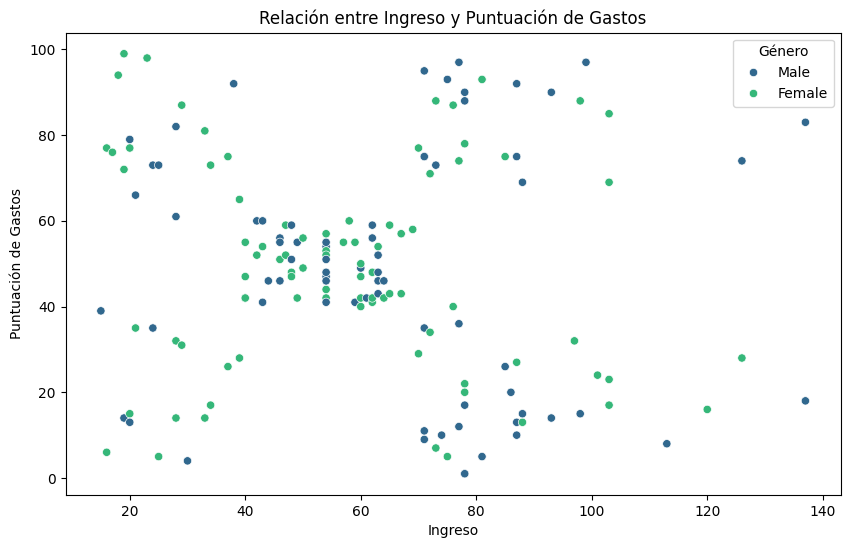

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Spending_Score', hue='Genre', data=df, palette='viridis')
plt.title('Relación entre Ingreso y Puntuación de Gastos')
plt.xlabel('Ingreso')
plt.ylabel('Puntuación de Gastos')
plt.legend(title='Género')
plt.show()

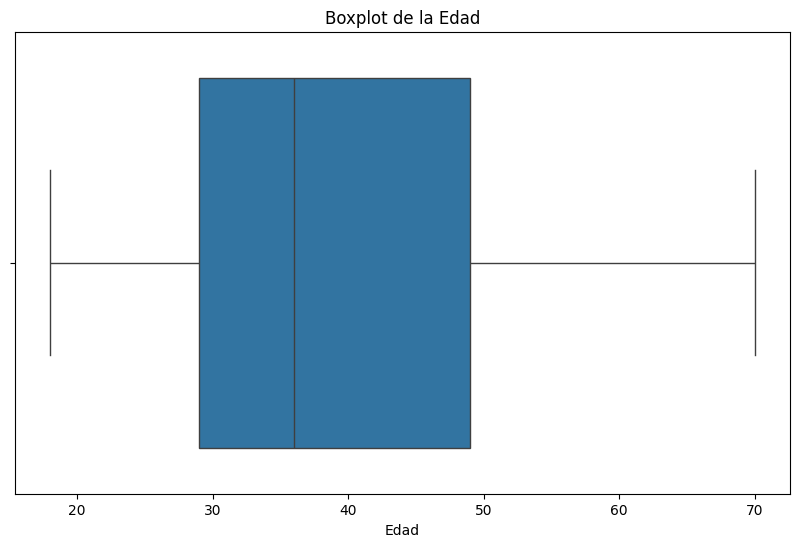

In [ ]:
# Boxplots para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=df)
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()

In [ ]:
# Matriz de Correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

ValueError: could not convert string to float: 'Male'

MARKETING: La mayoría de los clientes tienen edades que se concentran alrededor de los 30-40 años

DIVERSIDAD DE INGRESOS EN CLIENTES

HAY CLIENTES QUE GASTAN MASS QUE OTROS --> Podrian diseñar campañas de fidelidad, estrategias de precios

HAY VALORES FALTANTES

# EJERCICIOS DE ESTA CLASE, REPASAMOS LO VISTO HASTA AQUI EN CLASES PREVIAS

### 🛠 Procesando datos para ML- Feature Engeneering 🔧

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

#### DESCUBRIENDO NUEVAS VARIABLES

🤔 &nbsp; **_¿Puedo generar nuevas variables a través de las ya presentes? ¿Qué aportaría al entendimiento de los datos la creación de esta/s variable/s?_**

In [ ]:
def categorize_age(age):
    if age < 30:
        return 'Joven'
    elif 30 <= age < 50:
        return 'Adulto'
    else:
        return 'Mayor'

df['Age_Group'] = df['Age'].apply(lambda x: categorize_age(x) if pd.notnull(x) else None)

In [ ]:
def categorize_income(income):
    if income < 40000:
        return 'Bajo'
    elif 40000 <= income < 80000:
        return 'Medio'
    else:
        return 'Alto'

df['Income_Category'] = df['Income'].apply(lambda x: categorize_income(x) if pd.notnull(x) else None)


In [ ]:
df.head(5)

#### ESTANDARIZACION DE DATOS

🤔 &nbsp; **_¿Crees que tus variables deben ser estandarizadas?_**

Si es así, elige una estrategia y aplicala

🚀 _Recuerda qué_ vimos dos metodos para estandarizar o reescalar variables: `StandardScaler` que usa z-score y `MinMaxScaler` que reescala los datos linealmente. Lee la documentación para [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) y para [Min Max](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

- En una situación en la vida real, este paso podríamos realizarlo ahora, ya que ya sabriamos que algoritmo queremos usar o pregunta nos queremos contenstar. En el contexto del curso, aún no hemos visto aprendizaje automatico. Por lo cual, si no consideraron realizar un scaling esta bien. Podrán mas adelante.

In [ ]:
from sklearn.preprocessing import MinMaxScaler # NO DEJAR ESTO AQUI!!

scaler = MinMaxScaler()
df['Normalized_Income'] = scaler.fit_transform(df[['Income']])


#### TRANSFORMACION DE VARIABLES

🤔 &nbsp; **¿Tienes variables categoricas en tu dataset? ¿Estan representadas por números o por strings? ¿Crees que debes generar variables dummies o realizar un encoding de las categorias?**

🚀 _Recuerda qué_ hablamos de varias funciones para poder llevar a cabo estas transformaciones. Algunas de ellas como `get_dummies` y `map` pertenecen a `pandas`, mientras que otras como `LabelEncoder` y `OneHotEncoder` son parte de `sklearn`.

Si queres saber más, chequea la documentación de [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html), [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) y [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

#### 💾 &nbsp; GUARDANDO EL ARCHIVO PARA LOS SIGUIENTES PASOS

1) **Utiliza la función `.to_csv()` para guardar tu dataset**.